# Assignment

In this assignment, we look at some examples of third-party packages for EDA and visualizaiton. The data that we use is time series data. Time series data is very common and dealing with time series data sometimes requires that we take special care. The time series we use in this assignment has the monthly number of subspots between 1749 and 2013. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (8, 8)})
sunspots = pd.read_csv('sunspots.csv')

In [3]:
sunspots.head(5)

,date,spots
0,Jan 1749,58.0
1,Feb 1749,62.6
2,Mar 1749,70.0
3,Apr 1749,55.7
4,May 1749,85.0


In [4]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3177 non-null   object 
 1   spots   3177 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.8+ KB


#1 of 6
[2 of 16 pts]

- Convert the timestamp column into `datetime` and then set it as the index of the data. This is how we can let pandas know that we have a time series data. <span style="color:red" float:right>[2 point]</span>

In [6]:
sunspots['date'] = pd.to_datetime(sunspots['date'], format="%b %Y") #Convert the timestamp column into datetime
#sunspots.info() #check success with datatype 
#sunspots.head(5) #check success by printing

In [7]:
sunspots.set_index('date', inplace = True) #set date as the index of the dataframe
sunspots.head(5)

,spots
date,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


#2 of 6 [3 of 16 pts]
- Create a line plot of this time series, using the index in the x-axis. <span style="color:red" float:right>[1 point]</span>

<Axes: xlabel='date', ylabel='spots'>

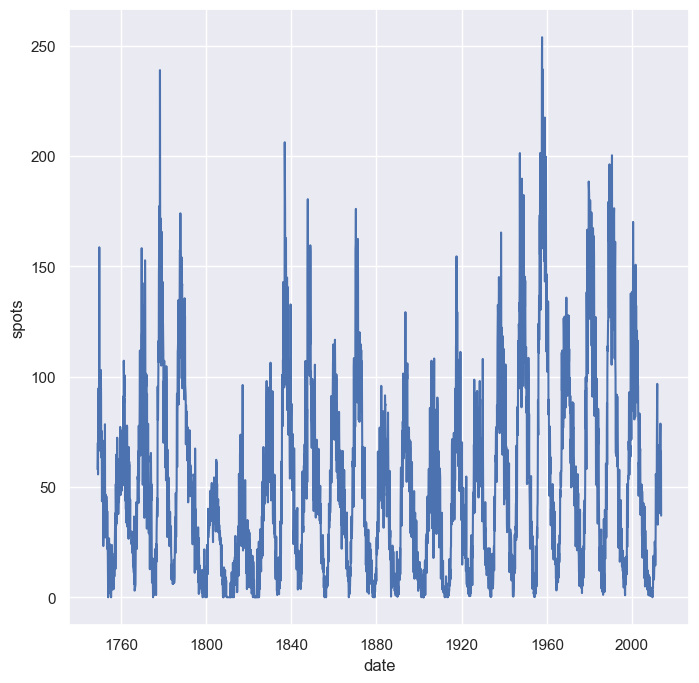

In [9]:
sns.lineplot(sunspots, x = sunspots.index, y = sunspots.spots) #Create a line plot of this time series, using the index in the x-axis

#3 of 6 [4 of 16 pts]
- The code at the beginning of the assignment set the figure size to a square aspect ratio of 8 by 8. Modify that code so the plot has a more pleasing wide aspect ratio. <span style="color:red" float:right>[1 point]</span>

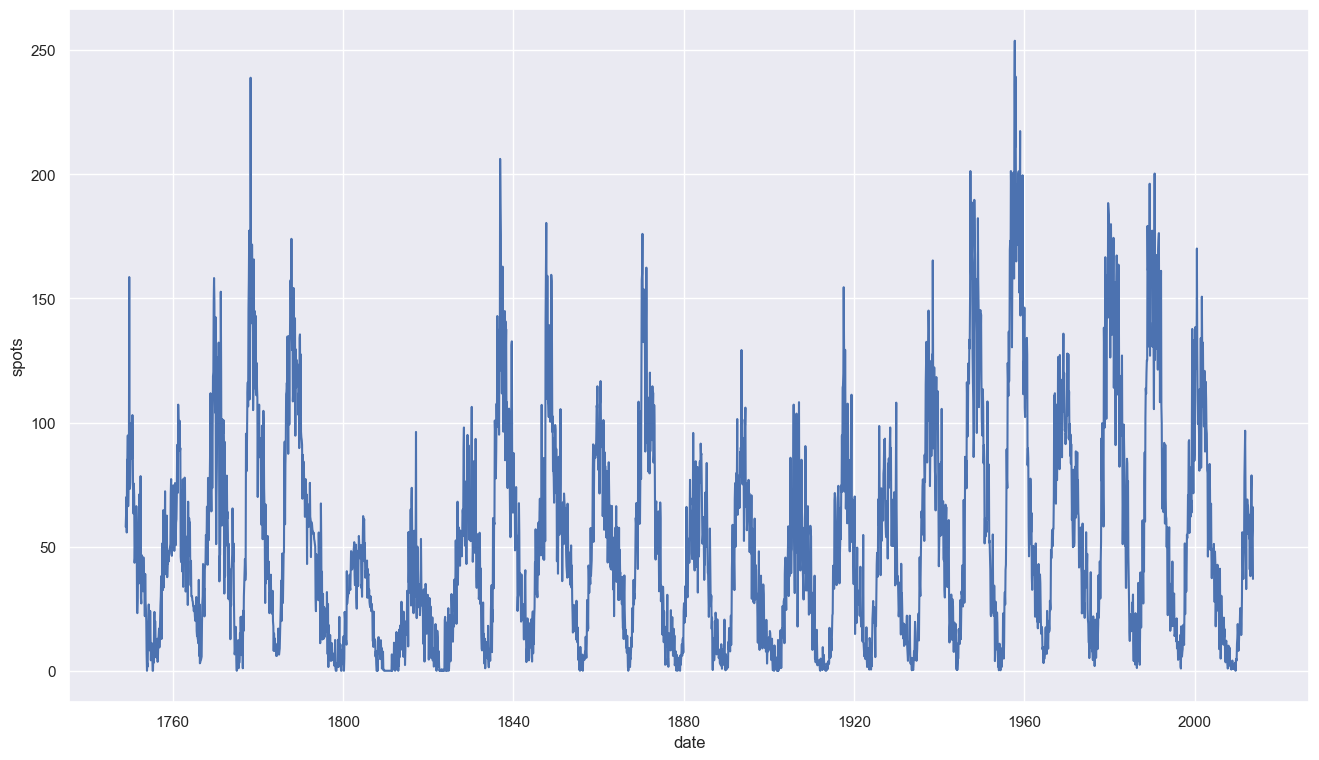

In [32]:
sns.lineplot(sunspots, x = sunspots.index, y = sunspots.spots) #Create a line plot of this time series, using the index in the x-axis
sns.set_theme(rc = {'figure.figsize': (16, 9)}) #Modify for a more pleasing ~wide~ aspect ratio

It is often helpful to smooth out a time series plot using a moving average. In `pandas`, we can easily calculate moving averages (or other statistic) using the `rolling` method. An example is shown below.

In [13]:
x = pd.Series([5, 9, 10, 4, 8])
x.rolling(3).mean()

0         NaN
1         NaN
2    8.000000
3    7.666667
4    7.333333
dtype: float64

#4 of 6 [6 of 16 pts]
- State why the first two values of series above are `NaN`. <span style="color:red" float:right>[2 point]</span>

The first two values of the series above are NaN because the rolling average is calculated with n, n-1, and n-2 (or the current and previous 2 values). 

For example: 

0 = average(null, null, 5)

1 = average(null, 5, 9)

2 = average(5, 9, 10) = 8.0

...

#5 of 6 [11 of 16 pts]
- Create a new plot that shows both the original time series and the smoothed out time series using a rolling average with the window size set to 24. Your plot should include labels to indicate which line plot is which, such as 'original' and 'rolling average'. <span style="color:red" float:right>[5 point]</span>

<Axes: xlabel='date', ylabel='spots'>

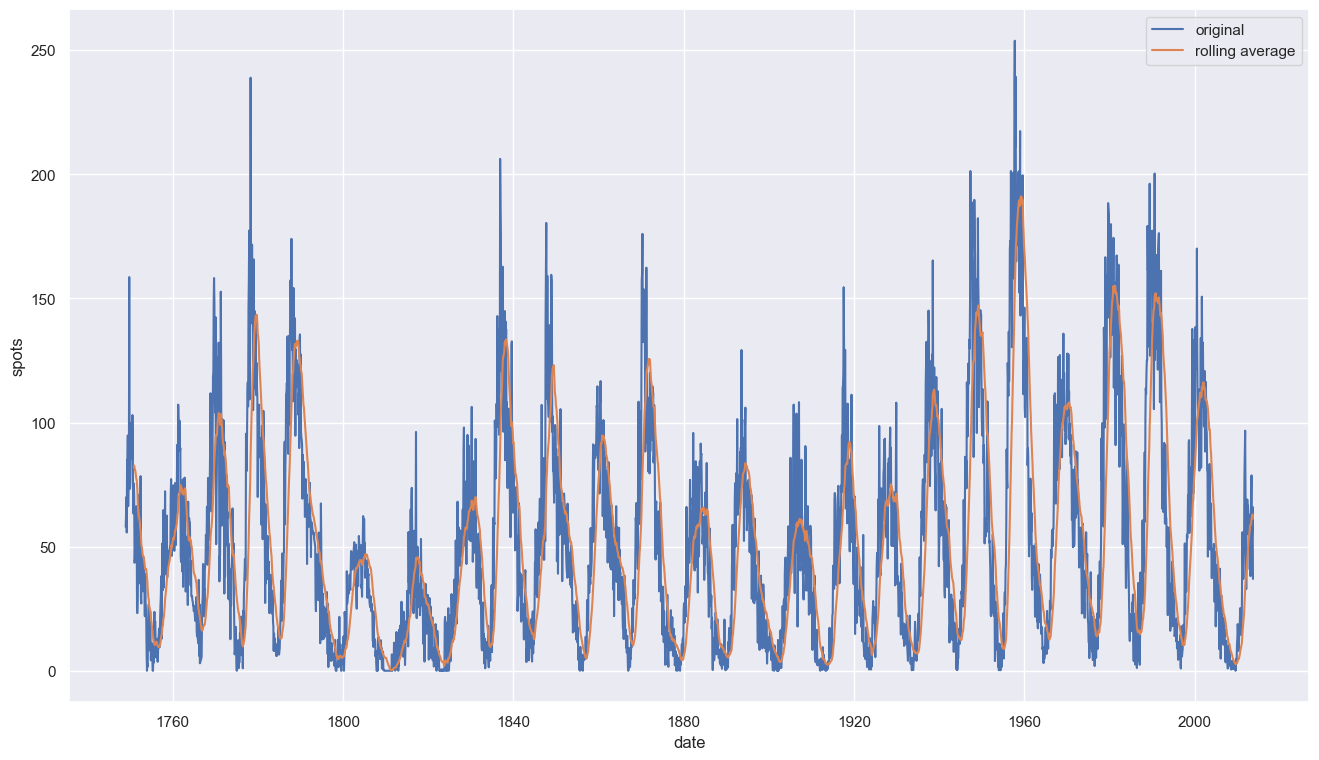

In [17]:
sns.lineplot(sunspots, x = sunspots.index, y = sunspots.spots, label="original") #original time series plot

sunspots_rolled_avg = sunspots.rolling(24).mean() #smoothed out time series using a rolling average with the window size set to 24
sns.lineplot(sunspots_rolled_avg, x = sunspots_rolled_avg.index, y = sunspots_rolled_avg.spots, label="rolling average") #rolling average time series plot


#6 of 6 [16 of 16 pts]
Another way to smooth out the data is to aggregate the data from monthly to yearly. There are different ways of doing that, but the easiest way is by using the `resample` method, as shown [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Since we are going from monthly data to yearly, we call this **downsampling**. We can also use `resample` to **upsample** the data.

- Use resample to aggregate the data to yearly totals, then plot a line plot of the data. <span style="color:red" float:right>[5 point]</span>

# 

<Axes: xlabel='date', ylabel='spots'>

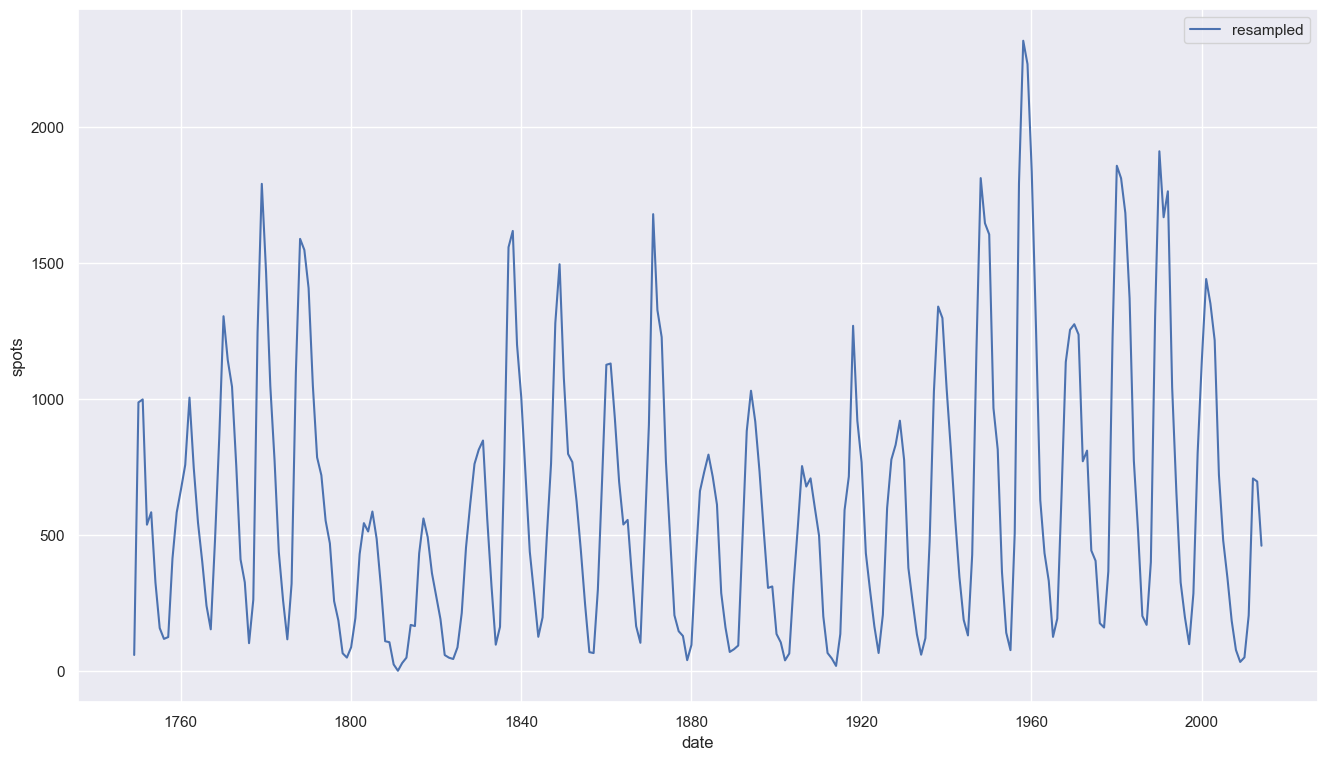

In [20]:
sunspots_resampled = sunspots.resample('12ME').sum() #aggregate the data from monthly to yearly
sns.lineplot(sunspots_resampled, x = sunspots_resampled.index, y = sunspots_resampled.spots, label="resampled") #plot a line plot of the data

The plot should show the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

# End of assignment